In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
malignant = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/combined/malignant'
benign = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/combined/benign'
normal = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/combined/normal'

In [ ]:

img_height, img_width = 200, 200
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,              # Random shear
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/combined',  # Path to your main folder
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/combined',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    #shuffle=False
)

Found 680 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


In [ ]:
'''
model = Sequential([
        Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width,3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(5, 5), activation='relu'),
        Conv2D(128, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(.5),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')

])


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
'''

"\nmodel = Sequential([\n        Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width,3)),\n        MaxPooling2D(pool_size=(2, 2)),\n        Conv2D(64, kernel_size=(5, 5), activation='relu'),\n        Conv2D(128, kernel_size=(5, 5), activation='relu'),\n        MaxPooling2D(pool_size=(2, 2)),\n        Flatten(),\n        Dense(256, activation='relu'),\n        Dropout(.5),\n        Dense(64, activation='relu'),\n        Dense(3, activation='softmax')\n\n])\n\n\nmodel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])\n\nmodel.summary()\n"

In [ ]:

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (7, 7), activation='relu', padding = 'same', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (5, 5), padding = 'same', activation='relu'))

# Convolutional Layer 3
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.75))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(3, activation='softmax'))  # 3 classes: benign, malignant, normal

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 200, 200, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 195, 195, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 97, 97, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 97, 97, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 93, 93, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 46, 46, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 270848)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      69,337,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,739,907 (266.04 MB)

 Trainable params: 69,739,907 (266.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 200

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    #validation_steps= validation_generator.samples // batch_size,
    epochs=epochs,

)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.4434 - loss: 1.3365 - val_accuracy: 0.5763 - val_loss: 0.8139
Epoch 2/200
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.4375 - loss: 0.8927

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.4375 - loss: 0.8927 - val_accuracy: 0.6017 - val_loss: 0.8251
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 706ms/step - accuracy: 0.5757 - loss: 0.8063 - val_accuracy: 0.6780 - val_loss: 0.6156
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.5781 - loss: 0.7993 - val_accuracy: 0.6441 - val_loss: 0.6421
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 822ms/step - accuracy: 0.6549 - loss: 0.6953 - val_accuracy: 0.8305 - val_loss: 0.4831
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.8438 - loss: 0.4739 - val_accuracy: 0.8390 - val_loss: 0.4528
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 783ms/step - accuracy: 0.7035 - loss: 0.6017 - val_accuracy: 0.7966 - val_loss: 0.4285
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.8281 - loss: 0.3988 - val_accuracy: 0.8136 - val_loss: 0.4382
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 727ms/step - accuracy: 0.8049 - loss: 0.4876 - val_accuracy: 0.

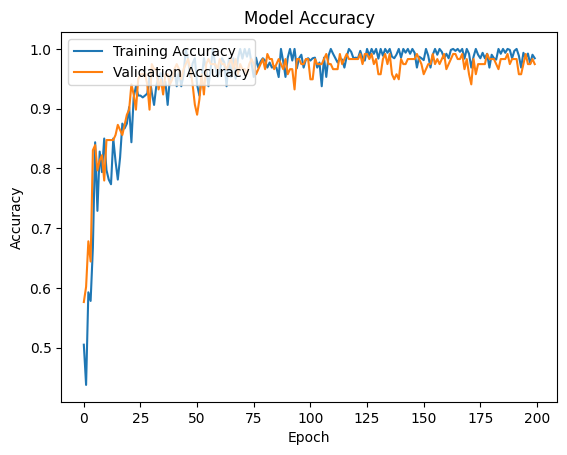

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9783 - loss: 0.0742
Validation Accuracy: 98.31%


In [ ]:
# Confusion matrix
import seaborn as sns
y_true = validation_generator.classes
y_pred = np.argmax((model.predict(validation_generator) > 0.5).astype("int32"), axis=-1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

y_pred = np.argmax(model.predict(validation_generator, verbose=1), axis=-1)

y_true = validation_generator.classes

y_pred

In [ ]:
y_pred